In [1]:
# Importing libraries 
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from Bio import SeqIO
from pathlib import Path
import numpy as np

In [2]:
# Run this cell if SRR8185316.fastq is not present in ./Input file
# subprocess.run(f'fastq-dump SRR8185316 --outdir ./Input -O ./Input/SRR8185316.fastq', shell=True)

In [4]:
# Easier to change dir later
ff = "./Input/SRR8185316.fastq"
tseq = "./tseq.txt"
spades_dir = "/Users/macbook/Downloads/SPAdes-3.15.5-Darwin/bin/spades.py" # Wherever SPAdes has been downloaded
spades_result = "./SPAdes_results"
fastqc_result = "./FASTQC_results"
reference_dir = "./sequence.fasta"
quast_dir = "./QUAST_results"

---

The *Sequence Read Archive (SRA)*, a centralized database at the *National Center for Biotechnology Information (NCBI)*, archives raw high-throughput sequencing data from various genomic studies. To facilitate the efficient retrieval and processing of this raw data, NCBI has developed the SRA Toolkit, which comprises command-line tools.

The SRA Toolkit was installed on the computer, and subsequently, the dataset **SRR8185316** was downloaded using the *fastq-dump* command This dataset could contain information such as that obtained from Whole Genome Sequencing (WGS) of the Escherichia coli (E. coli) bacterium.

A FASTQ file is a text-based format for storing both a biological sequence and its corresponding quality scores. Both the sequence letter and quality score are each encoded with a single ASCII character for brevity. A FASTQ file contains *4 lines* per sequence:

▶︎ Line 1 begins with a ‘@’ character and is followed by a sequence identifier and an optional description.

▶︎ Line 2 is the raw sequence letters.

▶︎ Line 3 begins with a ‘+’ character and is optionally followed by the same sequence identifier and any description again.

▶︎ Line 4 encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence.

The quality scores are used to indicate the confidence in the accuracy of each individual base call. These files are essential for downstream data analyses in bioinformatics, such as sequence alignment, variant calling, and other genomic or transcriptomic analyses.



***ATTENTION!***

*Before proceeding, either drag the SRRX.fastq file to the current working directory or change the file path {ff} to the directory where SRRX.fastq has been downloaded.*

### A(Q2-I)

In [19]:
# The dataset SRR8185316 is downloaded using fastq-dump,
# resulting in the SRR8185316.fastq file appearing in the chosen directory ff.
with open(ff, 'r') as file:
    lines = file.readlines()

# As each read is represented by 4 lines in the file,
# The total number of reads in a FASTQ file is determined by dividing the total number of lines by four,
number_of_reads = len(lines) // 4
print(f"Number of reads in fastq file: {number_of_reads}")

Number of reads in fastq file: 2297280


### A(Q2-II)

In [4]:
print("The first read:")
data = []
with open(ff, 'r') as file:
    for _ in range(4):
        line = file.readline().strip()
        data.append(line)
        print(line)
print("\nIdentifier: ", data[0][1:])
print("Quality: ", data[3])
print("Sequence: ", data[1])

The first read:
@SRR8185316.1 ERR022075.10741970 length=100
AGCGGTACACATTATGGGTCTGCTCTCCGCAGGCGGCGTACACAGCCACGAAGATCACATCATGGCGATGGTAGAACTGGCAGCTGAACGCGGCGCAGAA
+SRR8185316.1 ERR022075.10741970 length=100
IIGIIIIIIIIIIIIHIIIIIIIIIIIIIIIII@IHHEHIIIIIIIIIIIHIIHIIIIIIIIGIHIIHFIIEIIGIHHGH@BE3BB>@>>2?@8?>?A@1

Identifier:  SRR8185316.1 ERR022075.10741970 length=100
Quality:  IIGIIIIIIIIIIIIHIIIIIIIIIIIIIIIII@IHHEHIIIIIIIIIIIHIIHIIIIIIIIGIHIIHFIIEIIGIHHGH@BE3BB>@>>2?@8?>?A@1
Sequence:  AGCGGTACACATTATGGGTCTGCTCTCCGCAGGCGGCGTACACAGCCACGAAGATCACATCATGGCGATGGTAGAACTGGCAGCTGAACGCGGCGCAGAA


### A(Q2-III)

In [5]:
# In the terminal on a Mac, the grep command can be combined with -o and wc -l tp
# find and count occurrences of a specific subsequence in a file.
grep_command = f"grep -o 'TTAAATGGAA' {ff} | wc -l"
number_of_matches = subprocess.run(grep_command, shell=True, text=True, capture_output=True)
print(f"\nNumber of 'TTAAATGGAA' matches: {number_of_matches.stdout.strip()}")


Number of 'TTAAATGGAA' matches: 179


### A(Q2-IV)

Find the extracted sequences here > [**TSEQ.txt**](./tseq.txt)

In [12]:
# To take the first 4000 lines (1000 reads) from SRR8185316.fastq and 
# save them to a file you can use the head command.
# The resault can be seen in the newly made ./tseq.txt file.

print("Extracting the first 1000 sequences > tseq.txt")
head_command = f"head -n 4000 {ff} > {tseq}"
subprocess.run(head_command, shell=True)

Extracting the first 1000 sequences > tseq.txt


CompletedProcess(args='head -n 4000 ./SRR8185316.fastq > ./tseq.txt', returncode=0)

### A(Q2-V)

The following code snippet is using Biopython’s SeqIO.parse() function to parse a FASTQ file, which contains biological sequence data and corresponding quality scores.

SeqIO.parse is a generator function that reads sequence data in the ‘fastq’ format. Each iteration returns a SeqRecord object, containing the sequence and its quality scores, among other information.

Enumerate is a built-in Python function that also returns the index (i) of each record in the loop, starting from 0 for the first record.

record.letter_annotations['phred_quality'] accesses the quality scores from the sequence record. These quality scores are encoded as Phred quality scores which is logarithmically related to the base-calling error probabilities, calculated as Q = -10 * log10(e), where e is the estimated probability of a base call being wrong. This command takes the ASCII-encoded quality scores from a FASTQ file and converts them into integer numbers. 

In [6]:
quality_scores = []
for i, record in enumerate(SeqIO.parse(ff, 'fastq')):
    # Limit to the first 100,000 sequences
    if i >= 100000:  
        break
    quality_scores.append(record.letter_annotations['phred_quality'])

# Total number of Read
print(len(quality_scores))
# Number of base pairs in the first read
print(len(quality_scores[0]))
# Phred Score for each base in the first read
print(quality_scores[0])


100000
100
[40, 40, 38, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 31, 40, 39, 39, 36, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 40, 40, 39, 40, 40, 40, 40, 40, 40, 40, 40, 38, 40, 39, 40, 40, 39, 37, 40, 40, 36, 40, 40, 38, 40, 39, 39, 38, 39, 31, 33, 36, 18, 33, 33, 29, 31, 29, 29, 17, 30, 31, 23, 30, 29, 30, 32, 31, 16]


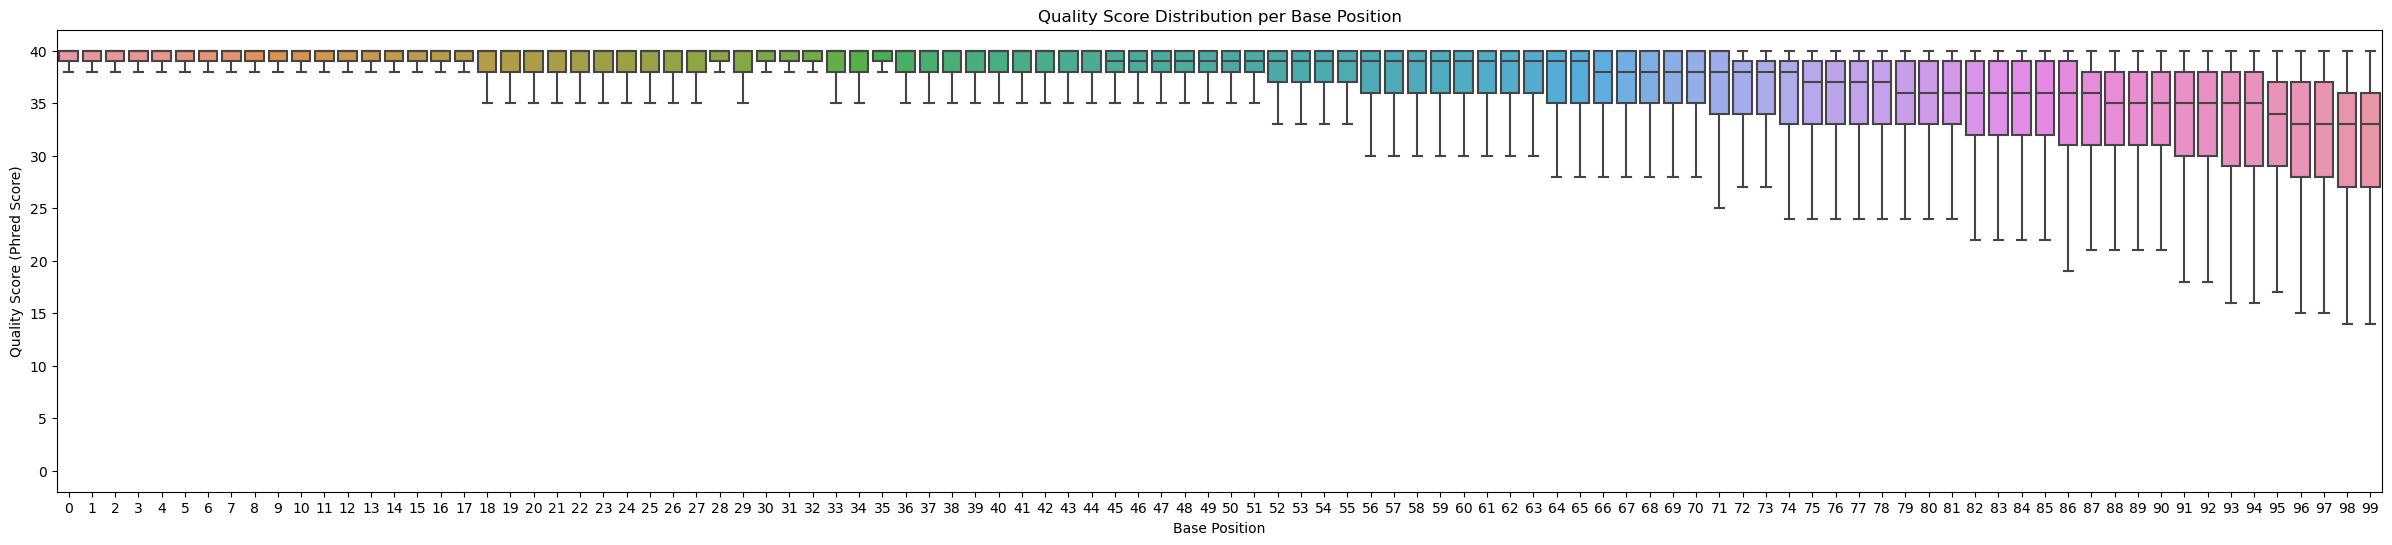

In [42]:
# Transpose the list to get a list of quality scores for each position
# we'll need to handle reads of different lengths accordingly.

# Using numpy for efficient transposition of varying lengths
# Get the maximum read length
max_length = max(map(len, quality_scores))
# Fill shorter reads with NaN
filled_scores = [scores + [np.nan] * (max_length - len(scores)) for scores in quality_scores]
transposed_quality_scores = np.array(filled_scores).T.tolist()

# Create a box plot for quality scores across each position
plt.figure(figsize=(30, 6))
sns.boxplot(data=transposed_quality_scores, fliersize=0)  # fliersize=0 to hide outliers
plt.title('Quality Score Distribution per Base Position')
plt.xlabel('Base Position')
plt.ylabel('Quality Score (Phred Score)')
plt.show()

### A(Q2-VI)

As it can be seen in the following plots, all reads has the same length of 100

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/dy/tthy682n3vd5w7z1m8cf15540000gn/T/ipykernel_29297/779200070.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(read_lengths)


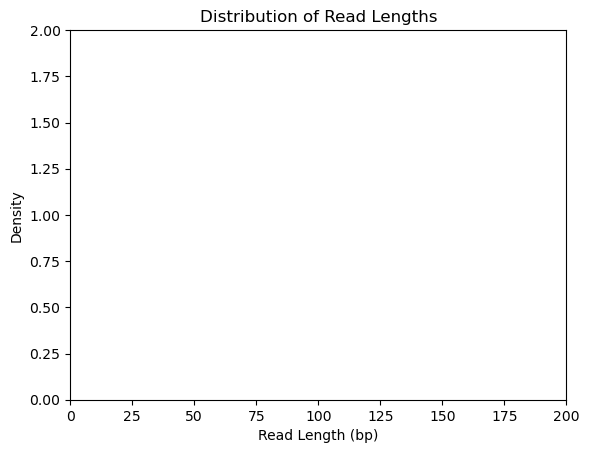

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


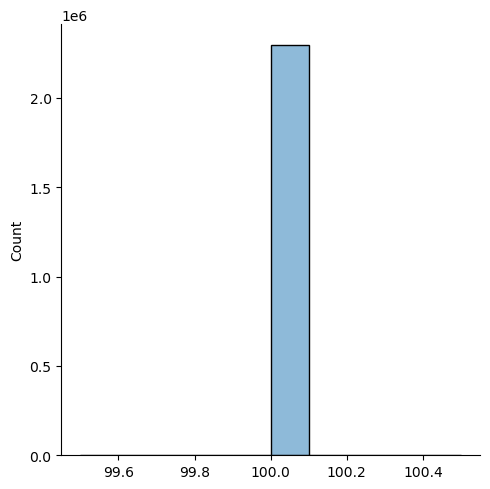

In [7]:
# Parse the FASTQ file and get read lengths
read_lengths = [len(record.seq) for record in SeqIO.parse(ff, "fastq")]

# Generate and plot the density of read lengths
sns.kdeplot(read_lengths)
plt.ylim(0, 2)
plt.xlim(0, 200)
plt.title('Distribution of Read Lengths')
plt.xlabel('Read Length (bp)')
plt.ylabel('Density')
plt.show()

sns.displot(read_lengths, bins=10, kde=True)
plt.show()


### A(Q3)

FastQC is a widely utilized tool for quality control of sequence data, particularly from high throughput sequencing platforms. It is designed to provide a quick, intuitive look at various quality metrics to help identify potential problems with the data.

In [8]:
# The resulting files can be found in ./FASTQC_results directory
print("Running FastQC...")
subprocess.run(f"fastqc {ff} -o {fastqc_result}", shell=True)

Running FastQC...
null


Started analysis of SRR8185316.fastq
Approx 5% complete for SRR8185316.fastq
Approx 10% complete for SRR8185316.fastq
Approx 15% complete for SRR8185316.fastq
Approx 20% complete for SRR8185316.fastq
Approx 25% complete for SRR8185316.fastq
Approx 30% complete for SRR8185316.fastq
Approx 35% complete for SRR8185316.fastq
Approx 40% complete for SRR8185316.fastq
Approx 45% complete for SRR8185316.fastq
Approx 50% complete for SRR8185316.fastq
Approx 55% complete for SRR8185316.fastq
Approx 60% complete for SRR8185316.fastq
Approx 65% complete for SRR8185316.fastq
Approx 70% complete for SRR8185316.fastq
Approx 75% complete for SRR8185316.fastq
Approx 80% complete for SRR8185316.fastq
Approx 85% complete for SRR8185316.fastq
Approx 90% complete for SRR8185316.fastq
Approx 95% complete for SRR8185316.fastq


Analysis complete for SRR8185316.fastq


CompletedProcess(args='fastqc ./SRR8185316.fastq -o ./FASTQC_results', returncode=0)

As it can be seen in the [**HTML FILE**](./FASTQC_results/SRR8185316_fastqc.html) and also the [**BASIC STATISTICS**](./FASTQC_results/SRR8185316_fastqc/fastqc_data.txt):

- Filename: SRR8185316.fastq
- File type: Conventional base calls
- Encoding: Sanger / Illumina 1.9
- Total Sequences:	2297280
- Total Bases:	229.7 Mbp
- Sequences flagged as poor quality:	0
- Sequence length:	100
- %GC:	49

Upon reviewing the [**SUMMERY**](./FASTQC_results/SRR8185316_fastqc/summary.txt), all tests except for *Per sequence GC content* have passed, which has a WARNING flag.

We will examine each graph in detail:

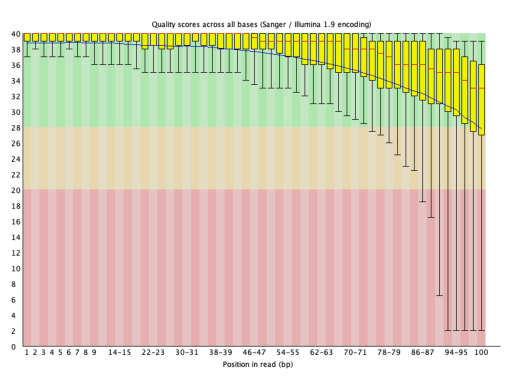

In [51]:
img = mpimg.imread('./FASTQC_results/SRR8185316_fastqc/Images/per_base_quality.png')
plt.imshow(img)
plt.axis('off')
plt.show()

The boxplot shows the quality scores across all bases at each position in the reads.
- The green region represents a high-quality score range, with a minimum Phred score around 30, which is generally considered good for most types of analyses. it is seen that all boxes are within this region so the overall quelity seems to be acceptable.
- Smaller boxes at the beginning of reads mean that there is less variability in the quality scores among those positions. This suggests consistent high-quality base calls. Larger boxes toward the end of the reads indicate increased variability in the quality scores at those positions. Quality often drops off toward the end of sequencing reads due to the inherent limitations of sequencing chemistries and base calling algorithms as they proceed. This can be also seen by the downward trend of the line on the boxplots.
- The lower bound of the boxplot (representing either the lower quartile or the minimum quality score within an interquartile range) extends into the red region in a FastQC report. It indicates that a notable number of bases have low-quality scores that fall below an acceptable threshold. This can be a sign that certain reads or positions within the reads have poor quality and may be less reliable for accurate base calling.

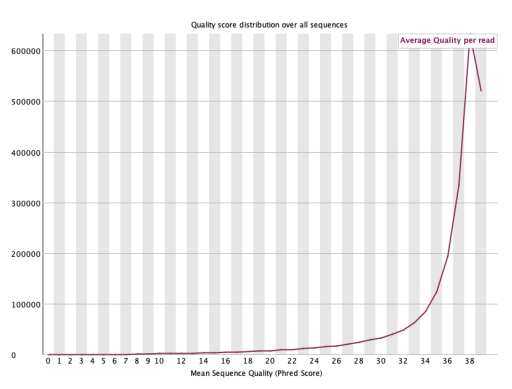

In [52]:
img = mpimg.imread('./FASTQC_results/SRR8185316_fastqc/Images/per_sequence_quality.png')
plt.imshow(img)
plt.axis('off')
plt.show()

The “Per Sequence Quality Scores” plot in FastQC provides a distribution of the average quality score for each read in the dataset. The line is almost at 0 up to a Phred score of 16 and then rises abruptly around a score of 38, peaking before falling off quickly.
- It suggests that the majority of the reads are of very high quality. The peak at Phred score 38 indicate that most reads have a high average quality score. Reads with average scores around 38 are considered excellent, as Phred scores over 30 correspond to an error probability of 0.001 or lower.
- The low counts for reads with average Phred scores less than 16 suggest that there are relatively few poor-quality reads in the dataset.
- In summary, this pattern indicates a good-quality sequencing run where the vast majority of reads are of excellent quality.

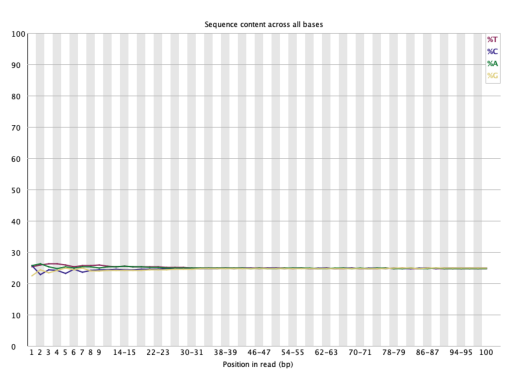

In [53]:
img = mpimg.imread('./FASTQC_results/SRR8185316_fastqc/Images/per_base_sequence_content.png')
plt.imshow(img)
plt.axis('off')
plt.show()

The “Per Base Sequence Content” graph in FastQC shows the proportion of each of the four nucleotides at each position across all reads. Normally, for a random library, one would expect the lines for each nucleotide to be fairly flat and close together because each base would occur with approximately equal frequency.

Here the variation in nucleotide distribution occurs in the first 15 base positions, and the values on the y-axis range between 20% and 30%, it suggests that the early positions of the sequencing reads may contain some non-random biases or artifacts. These could be due to:
- Primers or Adapters: Sequencing primers or adapter sequences used during library preparation are often the cause of non-random base composition at the start of reads.
- Library Preparation Artifacts: Certain library prep methods can introduce biases in the early cycles of sequencing.
- Multiplexing Tags: Barcode or multiplex identifiers used to distinguish different samples when pooled together can also lead to such patterns.

After the first 15 bases the lines for each nucleotide converge and show a consistent distribution, it might indicate that the initial biases are limited to the start of the reads, and the rest of the sequencing data reflects a more random base distribution.

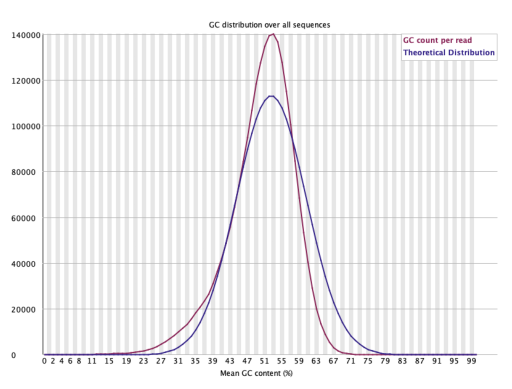

In [54]:
img = mpimg.imread('./FASTQC_results/SRR8185316_fastqc/Images/per_sequence_gc_content.png')
plt.imshow(img)
plt.axis('off')
plt.show()

The above trend indicates that the sample’s GC content is higher than what would be anticipated from a normal distribution. If FastQC shows a higher level of per sequence GC content compared to the expected theoretical distribution and displays a warning, it means that your sequencing data has more GC-rich sequences than typically expected for a random sample of DNA. This could be due to various reasons such as:

* Biological Reasons: The organism or the DNA region being sequenced might have a naturally high GC content.

* Sample Contamination: The presence of contaminant DNA from sources with different GC content.

* Library Preparation Bias: Some library preparation methods can introduce a bias towards GC-rich fragments.

* Sequencing Bias: Certain sequencing technologies have biases towards GC-rich or GC-poor regions.

The warning indicates that the results should be interpreted with caution as the bias could impact downstream analyses, such as sequence alignment and variant calling. It may be worth investigating the underlying causes and considering if any steps in your experimental design or sequencing process might have introduced this bias.

The following steps can be taken to handle this situation:
- Understand the Norm: Know the expected GC content for your organism or the type of sequences you are dealing with. Deviations might be normal for certain organisms or types of libraries.

- Assess Library Bias: High-throughput sequencing can introduce library preparation biases. Modify library preparation protocols if they are contributing to uneven GC representation.

- Evaluate Sequencing Errors: Ensure that the sequencing process has not resulted in systematic errors leading to an overestimation of GC content.

- Consider Biological Factors: High or skewed GC content could be biologically relevant, reflecting high GC regions in the genome, or the presence of contaminants or enrichments for certain regions (e.g., microbial contamination or amplification of GC-rich regions).

- Bioinformatic Correction: Some bioinformatics tools can correct for GC bias during data analysis.

- Data Normalization: In some cases, applying normalization methods that account for GC bias might be necessary.

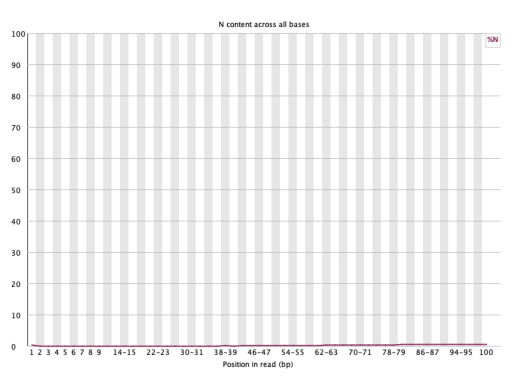

In [55]:
img = mpimg.imread('./FASTQC_results/SRR8185316_fastqc/Images/per_base_n_content.png')
plt.imshow(img)
plt.axis('off')
plt.show()

The “Per Base N Content” graph represents the proportion of ambiguous bases at each position in the reads. A line at the base of the graph, which is out case, indicates that there is a very low percentage of ‘N’ bases throughout the sequences, which is good as it shows that the sequencing data is of high quality with few undetermined bases.

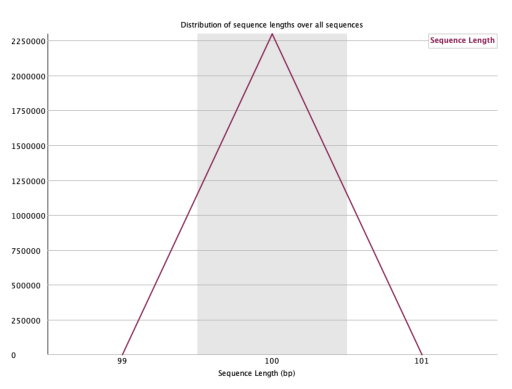

In [56]:
img = mpimg.imread('./FASTQC_results/SRR8185316_fastqc/Images/sequence_length_distribution.png')
plt.imshow(img)
plt.axis('off')
plt.show()

The “Sequence Length Distribution” graph shows an upside-down “V” shape peaking at 100 and ranging from 99 to 101 and indicates that the majority of sequence reads are centered around 100 nucleotides in length, with a tight distribution. This suggests that the sequencing process was consistent, generating reads of uniform length.

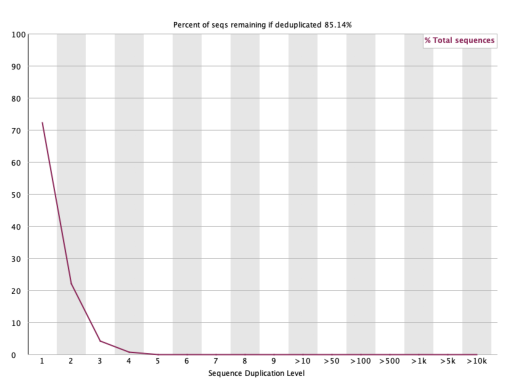

In [57]:

img = mpimg.imread('./FASTQC_results/SRR8185316_fastqc/Images/duplication_levels.png')
plt.imshow(img)
plt.axis('off')
plt.show()

A “Duplication Level” graph starting at 75 on the y-axis and declining to 0 near the value of 5 on the x-axis suggests that a fairly high percentage of reads (75%) are not duplicated (unique). As the duplication level (x-axis) increases, indicating the number of times a specific sequence is duplicated, the percentage of reads (y-axis) showing these higher levels of duplication drops off rapidly, reaching 0 by the time you get to sequences that are duplicated five times. This indicates that very few reads appear in the dataset five times or more. This trend is often desired as it suggests more of the reads are unique representations of the source material, providing a more comprehensive coverage of the sequenced genome.

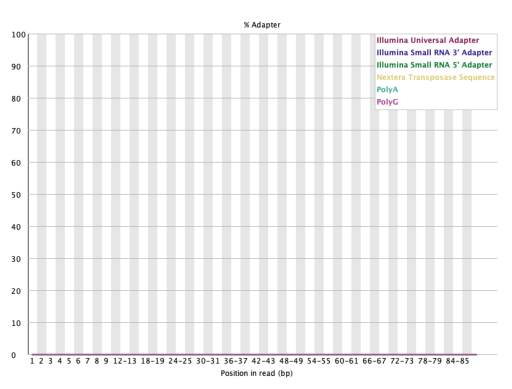

In [58]:
img = mpimg.imread('./FASTQC_results/SRR8185316_fastqc/Images/adapter_content.png')
plt.imshow(img)
plt.axis('off')
plt.show()

The “Adapter Content” graph is flat at the bottom line, this indicates that no adapter sequences were detected in the reads. A graph showing 0% adapter content means that the sequencing data is clean, and no contamination from adapter sequences is affecting the results, which is a sign of high-quality sequencing data.

---
### B(Q1)

An assembler in the context of genomics is a software tool used to piece together DNA sequences from fragmentary data obtained through next-generation sequencing (NGS) techniques. These DNA fragments, often referred to as “reads,” are assembled into longer sequences called contigs or scaffolds, which represent regions of an organism’s genome or even the entire genome.

The assembler aligns and merges overlapping reads to reconstruct the original DNA sequence. This process is vital for genomic analysis, particularly for organisms for which a reference genome is not available (de novo assembly), as well as for variant detection and comparative genomics among related species.

SPAdes  (St. Petersburg genome assembler) is particularly useful for assembling bacterial and small eukaryotic genomes. It’s known for its capability to produce high-quality draft assemblies by effectively managing the errors and complexities that come with NGS (Next-Generation Sequencing) data.

In [17]:
spades_command = f"{spades_dir} -m 700 -s {ff} -o {spades_result}"
subprocess.run(spades_command, shell=True)



== Warning ==  output dir is not empty! Please, clean output directory before run.




== Warning ==  No assembly mode was specified! If you intend to assemble high-coverage multi-cell/isolate data, use '--isolate' option.


Command line: /Users/macbook/Downloads/SPAdes-3.15.5-Darwin/bin/spades.py	-m	700	-s	/Users/macbook/Documents/VSC/Project1/SRR8185316.fastq	-o	/Users/macbook/Documents/VSC/Project1/SPAdes_results	

System information:
  SPAdes version: 3.15.5
  Python version: 3.11.5
  OS: macOS-13.4.1-arm64-arm-64bit

Output dir: /Users/macbook/Documents/VSC/Project1/SPAdes_results
Mode: read error correction and assembling
Debug mode is turned OFF

Dataset parameters:
  Standard mode
  For multi-cell/isolate data we recommend to use '--isolate' option; for single-cell MDA data use '--sc'; for metagenomic data use '--meta'; for RNA-Seq use '--rna'.
  Reads:
    Library number: 1, library type: single
      left reads: not specified
      right reads: not specified
      interlace

CompletedProcess(args='/Users/macbook/Downloads/SPAdes-3.15.5-Darwin/bin/spades.py -m 700 -s ./SRR8185316.fastq -o ./SPAdes_results', returncode=0)

- Contigs and scaffolds: [**CONTIGS.fasta**](./SPAdes_results/contigs.fasta) and [**SCAFFOLDS.fasta**](./SPAdes_results/scaffolds.fasta)
- Assembly graphs: [**ASSEMBLY_GRAPH.fastg**](./SPAdes_results/assembly_graph.fastg), [**ASSEMBLY_GRAPH_WITH_SCAFFOLDS.gfa**](./SPAdes_results/assembly_graph_with_scaffolds.gfa), [**ASSEMBLY_GRAPH_AFTER_SIMPLIFICATION.gfa**](./SPAdes_results/assembly_graph_after_simplification.gfa)
- Paths in the assembly graph corresponding to the contigs: [**CONTIGS.paths**](./SPAdes_results/contigs.paths)
- Paths in the assembly graph corresponding to the scaffolds: [**SCAFFOLD.paths**](./SPAdes_results/scaffolds.paths)



### B(Q2)

QUAST (Quality Assessment Tool for Genome Assemblies) is a tool to evaluate the quality of a draft genome assembly. QUAST helps in analyzing and providing statistics on such assemblies by comparing them against reference genomes if available. The tool outputs metrics like the number of contigs, the total length of the assembly, the largest contig size, N50, L50, and GC content among others.

These metrics are crucial to assess the completeness, accuracy, and overall quality of the assembled genome, which is important for ensuring the reliability of the assembly before proceeding with further genomic analyses or research activities.

In [ ]:
quast_command = f"quast.py -r {reference_dir} -o {quast_dir} /Users/macbook/Documents/VSC/Python/SPAdes_results/contigs.fasta"
subprocess.run(quast_command, shell=True)

Quast report can be found in [**REPORT.txt**](./QUAST_results/report.txt)

**Contig Metrics File:**

- With 83 contigs longer than 5,000 bp and the largest contig being 221,601 bp, the assembly shows good contiguity.
- The N50 of 71,324 and L50 of 18 suggest that half of the genome is contained in contigs equal to or larger than 71,324 bp, indicating a high-quality assembly.

**Aligned Sequences File:**

- The total aligned length is 4,543,859 bp with a genome fraction of 97.937%, signifying that nearly the entire reference genome is represented in the assembly.
- A duplication ratio of 1.000 and no unaligned contigs demonstrate a lack of redundancy and good overall alignment.

**Conserved Genes File:**

- This file’s contents are implicit; the high genome fraction implies good coverage of conserved regions.

**Misassemblies File:**

- The assembly has a very low count of misassemblies (1), with a correspondingly low number of misassembled contigs (1), totaling 182,275 bp, indicating an accurate assembly.

**Gaps File:**

- No explicit data given on gaps, but 0 scaffold gap misassemblies and no N’s per 100 kbp show that there are no gaps within the assembled scaffolds.

**Contigs Size Distribution:**

- The assembly includes a broad distribution of contig sizes, with a dominance of larger contigs: 37 are over 50,000 bp and 83 are over 5,000 bp, indicating a good size distribution.
- The presence of 124 contigs in total highlights a moderately fragmented assembly.

**Assembly Length:**

- The total length of the assembly is 4,544,603 bp, which is very close to the reference length of 4,639,675 bp, revealing that the draft covers most of the reference genome.

**Largest Contig:**

- The largest individual contig is 221,601 bp, suggesting excellent individual sequence continuity. The fact that this approaches the total alignment’s largest length of 221,546 bp signifies a well-aligned top-level contig.

**Reference Comparison:**

- Genome fraction is extremely high at 97.937%, implying nearly complete representation of the reference genome in the assembly.

**Assembly Quality Metrics:**

- N50 of 71,324 bp and L50 of 18, alongside other metrics like N90 and L90, suggest substantial continuity, with the bulk of the assembly composed of large contigs.
- Only one misassembly with a zero count for local misassemblies, unaligned misassembled contigs, and scaffold gap misassemblies, reflects a high degree of accuracy.
- The very low mismatches (1.34 per 100 kbp) and indels (0.22 per 100 kbp), along with a 1.000 duplication ratio and zero N’s per 100 kbp, indicate excellent correctness and integrity.

**Miscellaneous:**

- The GC content of 50.72% almost exactly matches the reference GC content of 50.79%, which is expected for a correctly assembled genome.
- The fact that there are no unaligned contigs and the unaligned length is 0 bp indicates that all assembled contigs have some representation within the reference genome.

---
### C(Q1)

BWA (Burrows-Wheeler Aligner) is used for mapping or aligning the Illumina short-read data to a reference genome. BWA is used to align sequencing reads to a larger reference sequence such as a complete genome or a chromosome. This is an essential step in many bioinformatics analyses, allowing researchers to locate where the sequenced DNA fragments originated from within the genome.

Indexing in BWA involves creating a set of data structures from the reference genome that allows for a fast search and alignment of sequencing reads. This step processes the reference genome to create a compact representation that can then be quickly cross-referenced with short DNA sequences (reads) from a sequencing machine.

In [21]:
subprocess.run(f"bwa index {reference_dir}", shell=True)
subprocess.run(f"bwa mem {reference_dir} {ff} > output.sam", shell=True)

[bwa_index] Pack FASTA... 0.03 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.70 seconds elapse.
[bwa_index] Update BWT... 0.02 sec
[bwa_index] Pack forward-only FASTA... 0.01 sec
[bwa_index] Construct SA from BWT and Occ... 0.18 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index ./sequence.fasta
[main] Real time: 0.956 sec; CPU: 0.953 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 100000 sequences (10000000 bp)...
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 1.904 CPU sec, 1.875 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 1.989 CPU sec, 1.911 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 1.876 CPU sec, 1.795 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_process_seqs] Processed 100000 reads in 2.014 CPU sec, 1.938 real sec
[M::process

CompletedProcess(args='bwa mem ./sequence.fasta ./Input/SRR8185316.fastq > output.sam', returncode=0)

---
### C(Q2)

A SAM (Sequence Alignment/Map) file is a text-based format for storing biological sequences aligned to a reference sequence. It is widely used in bioinformatics for storing sequence alignment data. A SAM file typically contains:

* Header Section: The header lines start with ‘@’ and describe metadata about the alignment, including the format version, reference sequence names and lengths, read groups, and program information.

* Alignment Section: Following the headers, each line represents an alignment of a read. A single line includes fields like the read name, reference sequence name, position, mapping quality, CIGAR string, and the actual sequence of the read, among others.

This format allows for a detailed description of the alignment, including how each read maps to the reference, mismatches, insertions, deletions, and other variants. The alignment section entries facilitate downstream analyses such as variant calling, coverage analysis, and gene expression quantification.

In [26]:
subprocess.run(f"head output.sam", shell=True)

@SQ	SN:U00096.2	LN:4639675
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem ./sequence.fasta ./Input/SRR8185316.fastq
SRR8185316.1	0	U00096.2	3783615	60	100M	*	0	0	AGCGGTACACATTATGGGTCTGCTCTCCGCAGGCGGCGTACACAGCCACGAAGATCACATCATGGCGATGGTAGAACTGGCAGCTGAACGCGGCGCAGAA	IIGIIIIIIIIIIIIHIIIIIIIIIIIIIIIII@IHHEHIIIIIIIIIIIHIIHIIIIIIIIGIHIIHFIIEIIGIHHGH@BE3BB>@>>2?@8?>?A@1	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRR8185316.2	0	U00096.2	1394282	0	100M	*	0	0	TAATGGCCGGCGACCTTATCCGCTGGAAACCATGCTACGCATTCACTGCATGCAGCATTGGTACAACCTGAGCGATGGCGCGATGGAAGATGCTCTGTAC	HHHHHHHHHHDHHDHHHGFGHDGGHG>GGGG<GDGHHEGH@EGGGHBHBHHHGHHFHHHHDEDFFHBHEFHHHH<FHDBH@HCBCG3DDB+?:=8DDBBD	NM:i:0	MD:Z:100	AS:i:100	XS:i:100
SRR8185316.3	16	U00096.2	3679372	60	100M	*	0	0	ATTTCAGCGGATCGGCAGGATGGGGACCTAACAAGGTTGACCCTTTCAGACGATAGCGCCGCCAGCCCTCTTTAGTATCGGCAGGCCAGGTTGCCACCAT	###########################################################?/;<?8=B<2A>A=A2CCACEGEDE@GEGBDDFH>HHDHH=	NM:i:4	MD:Z:0G20C1T36A39	AS:i:84	XS:i:0
SRR8185316.4	16	U00096.2	2416639	60	

CompletedProcess(args='head output.sam', returncode=0)

100M	*	0	0	CAATTGCGGCTCTTTTTTCATTCTGCCGTTTCAGTCTCTACGGCTTCATTTTTGGCATTGCGCTTCATCCACAACGCTAGCGCTTTCAGCGAGTCTGGAG	8B@B8@BA>ACCIEIHHHGII+IIIIIIGHIIHIFIFIIEIGEFHIIIIEIIIIIIIHFIIIIIIIIHIFIIIIIFIIIIIGIIIHIEIIIIIIIIIIII	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRR8185316.5	0	U00096.2	783	60	100M	*	0	0	TCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGAT	HHHHHHFHHHHHHFBHHHHGHHGHHGEGDGGGDBGGFG@GGGGEDEGCGGHHHEGHFHG@EFFHDFDDCC>9BBDEEBEEEDGDDBBC:@##########	NM:i:0	MD:Z:100	AS:i:100	XS:i:0
SRR8185316.6	16	U00096.2	4034103	0	100M	*	0	0	GTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCTGATACTGGCAA	8EGEBEGDEDBHFHGFEDHHEHDHHHGHHHFBGFG>DFFHGDGG@HHFDHHHFHHGHGHHHHH>HEHHHHHHHHGDHGHHHHHHHEHHGHHHHHHHHHHG	NM:i:0	MD:Z:100	AS:i:100	XS:i:100
SRR8185316.7	0	U00096.2	4043105	60	100M	*	0	0	ATCCCTCAGCAGTGCGCCAATTTATCATCCAGTATAACATTGCGATGCAGAAGCAGCTTGCTGCACACCCTGAGTTAGCAAACGATGAAGTTGCTCTGCA	IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

**@SQ**: Refers to the reference sequence dictionary. The sequence name SN:U00096.2 is the identifier for the reference sequence, and LN:4639675 indicates that the length of the reference sequence is 4,639,675 bp.

**@PG**: Indicates the programs used for processing the reads. ID:bwa is the program id, PN:bwa is the program name, VN:0.7.17-r1188 specifies the version of the software, and CL:bwa mem ./sequence.fasta ./SRR8185316.fastq shows the command line that was used.

the following alignment information helps understand how each read aligns to the reference genome, including their position, match quality, potential errors, and strand orientation.

**Alignment Lines**
Each alignment line represents a read, and about columnms:
- Column 1 (QNAME): The query template name. For example, SRR8185316.1 is the name of the first read.
- Column 2 (FLAG): The bitwise FLAG (each bit is a flag). 0 means the read is mapped in a proper pair; 16 indicates the read is mapped to the reverse strand.
- Column 3 (RNAME): The reference sequence name; here, it’s U00096.2.
- Column 4 (POS): 1-based leftmost mapping position; for example, 3783615 is where the first read (SRR8185316.1) starts.
- Column 5 (MAPQ): The mapping quality. 60 is a high score meaning the alignment quality is high; 0 may indicate ambiguities in mapping.
- Column 6 (CIGAR): CIGAR string. 100M means all 100 bases in the read are matched to the reference.
- Column 7 (RNEXT): Reference name of the mate/next read (* indicates no information here).
- Column 8 (PNEXT): Position of the mate/next read (0 if not available).
- Column 9 (TLEN): Observed Template LENgth (0 if not applicable).
- Column 10 (SEQ): Segment sequence. This is the actual read for the DNA sequencing.
- Column 11 (QUAL): ASCII of Phred-scaled base quality plus 33. High-quality scores are represented by characters like H or I, lower quality by characters like # or +.
- NM:i:0 indicates the number of mismatches. 0 means no mismatches. The NM:i:4 suggest there are four mismatches in this read versus the reference.
- MD:Z:100 indicates the string for mismatching positions. 100 means all positions match the reference. The MD:Z:0G20C1T36A39 suggest there are four mismatches in this read versus the reference.
- AS:i:100 is the alignment score.
- XS:i:0 or XS:i:100 might represent the suboptimal alignment score.

---
### C(Q3)

A BAM file is the binary counterpart to the SAM (Sequence Alignment/Map) file format in bioinformatics. Both are used to store sequence alignment data, but the BAM format is compressed to save space and is optimized for fast random access. This format is more suitable for storing large volumes of sequence alignment data that result from high-throughput sequencing experiments. BAM files are often sorted by genomic coordinates and indexed for efficient retrieval of sequence alignment information pertaining to specific genomic regions. They are used in various downstream analyses, including variant calling, but require specific software tools like samtools for viewing and manipulations.


In [9]:
subprocess.run(f"samtools view -Sb output.sam > output.bam", shell=True)
subprocess.run(f"samtools sort output.bam -o sorted_output.bam", shell=True)
subprocess.run(f"samtools index sorted_output.bam", shell=True)

CompletedProcess(args='samtools index sorted_output.bam', returncode=0)

### C(Q4)

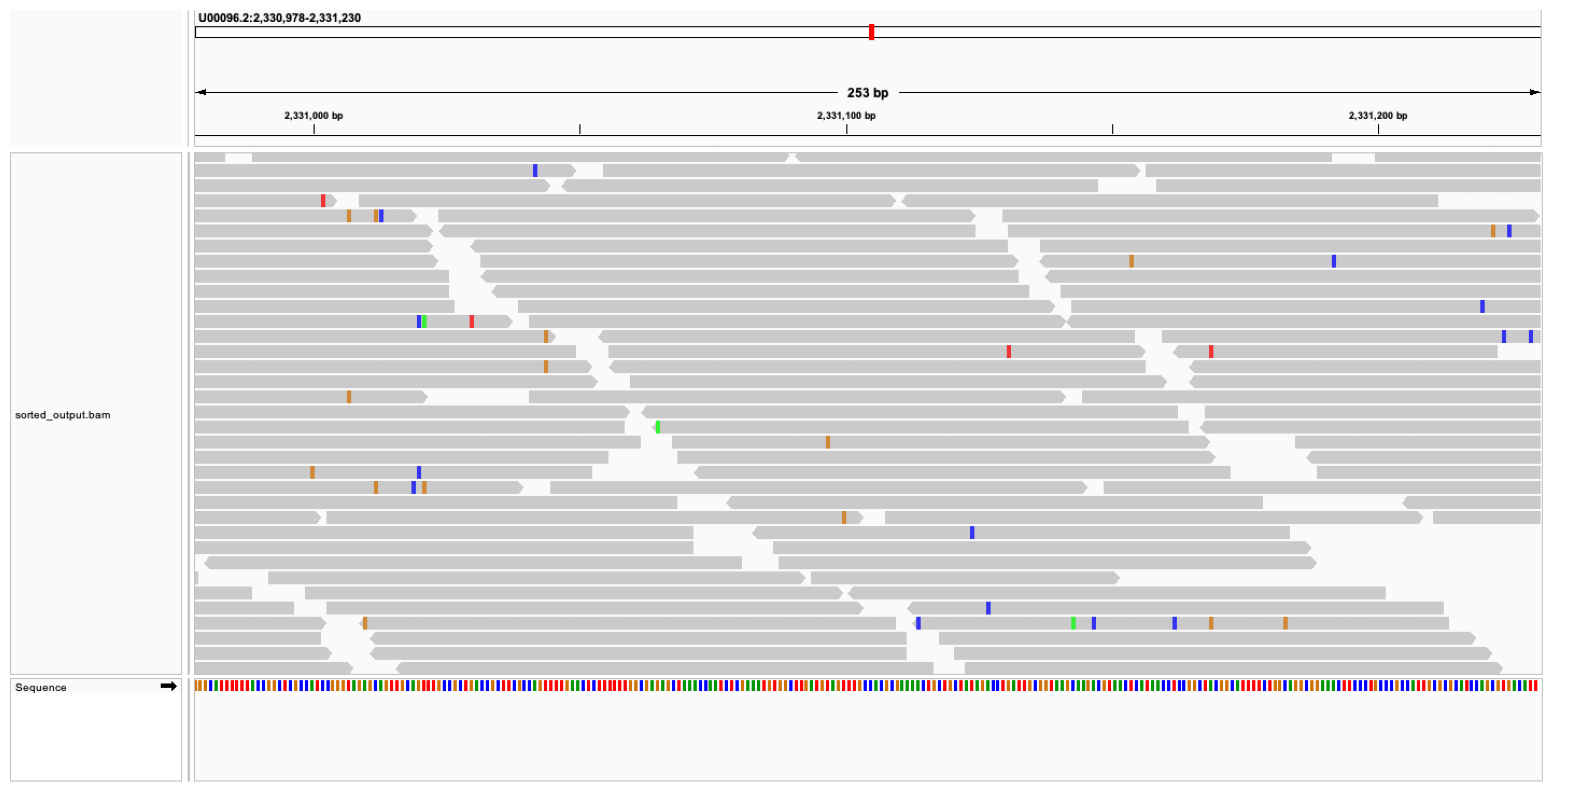

In [48]:
plt.figure(figsize=(20, 15)) 
img = mpimg.imread('./IGV_snapshots/253bp.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Grey Horizontal Bars:
- Alignment record or reads. As we expect, all reads are of same size (100) and so are the bar size in the graph.
- White (blank) regions show that no reads has been mapped to that region.
- Variants: Colored indicators or symbols representing single nucleotide polymorphisms (SNPs), insertions, deletions, and other mutations.
- Orientation of reads: The “>” shape often indicates the forward direction of the read, pointing towards the direction in which the read is sequenced. The “|” shape typically represents the end of a read that is not continuing in that direction.

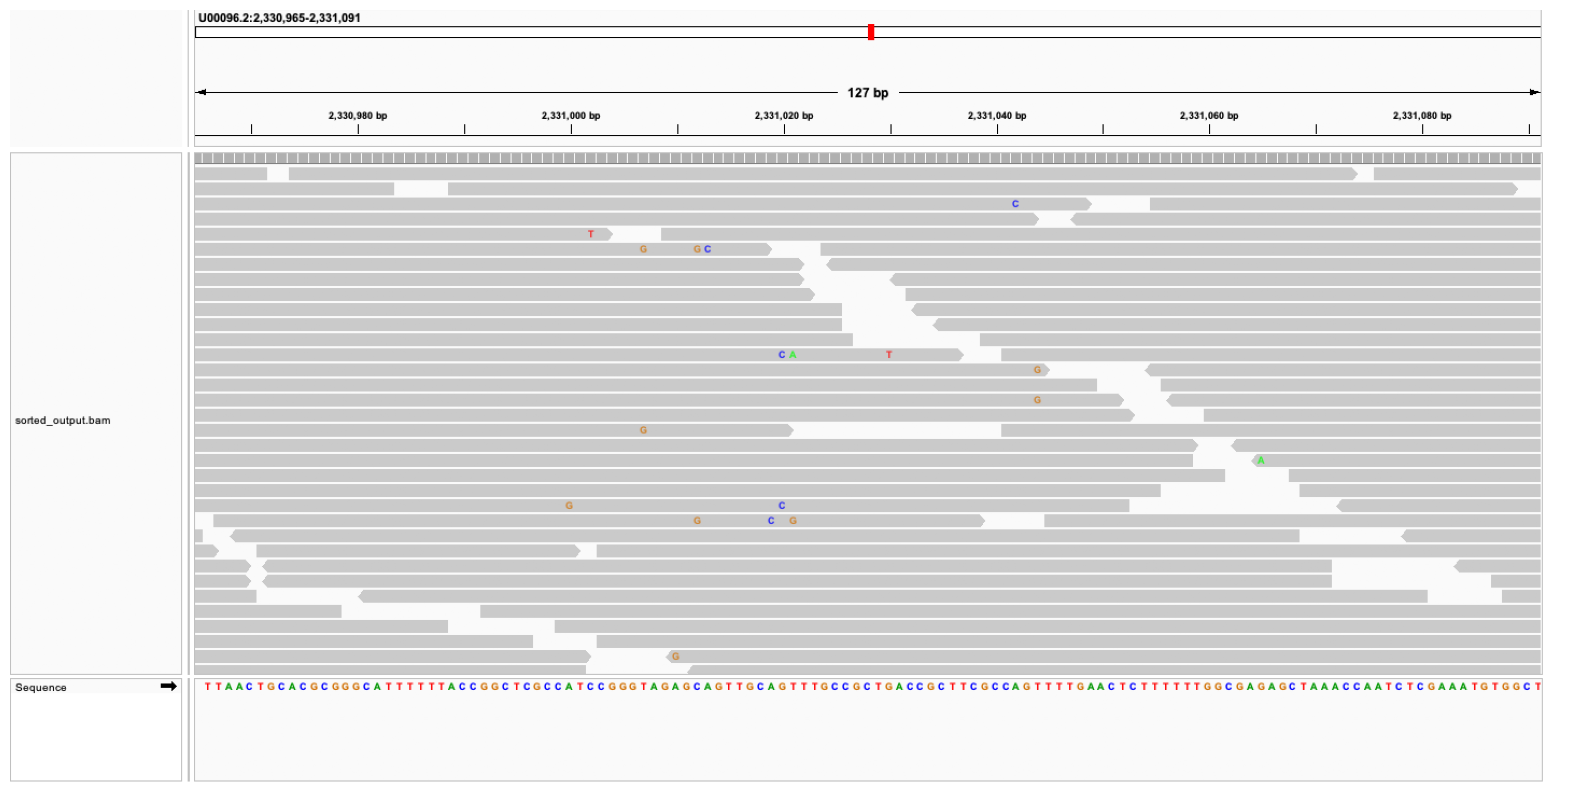

In [47]:
plt.figure(figsize=(20, 15)) 
img = mpimg.imread('./IGV_snapshots/127.png')
plt.imshow(img)
plt.axis('off')
plt.show()

When zoomed in sufficiently, the *reference genome sequence* track appears at the top of the lower panel. The sequence is represented by colored bars or colored letters, depending on zoom level, with adenine (A) in green, cytosine (C) in blue, guanine (G) in yellow, and thymine (T) in red.

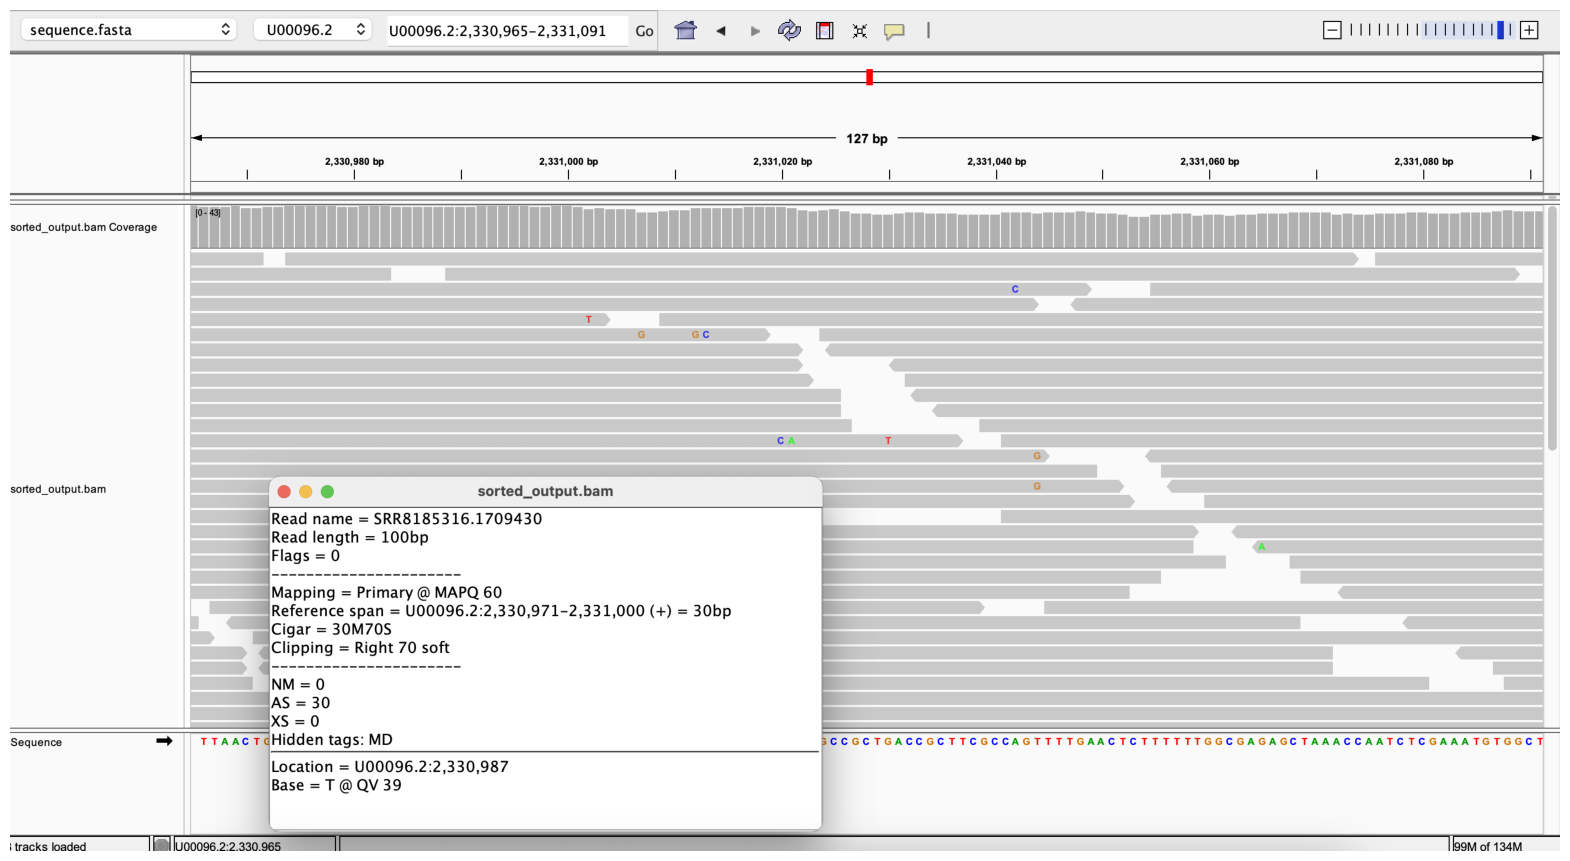

In [49]:
plt.figure(figsize=(20, 15)) 
img = mpimg.imread('./IGV_snapshots/Screenshot 2023-12-23 at 19.58.39.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Vertical Bars in front of “sorted_output.bam Coverage”:
- These are depicting the depth of coverage at specific positions in the reference sequence. Each vertical bar represents how many reads (DNA sequencing reads) are aligned to that particular position in the genome. The height of the bar is proportional to the number of reads; higher bars indicate more reads, which implies greater coverage at that position.

Window
- Upon clicking on a read in the Integrative Genomics Viewer (IGV), a window pops up displaying information about that specific read, including the CIGAR string. In the example given, the CIGAR string reads “30M70S,” indicating that there are 30 matching bases that align with the reference sequence followed by 70 soft-clipped bases, which are present in the read but not aligned to the reference.

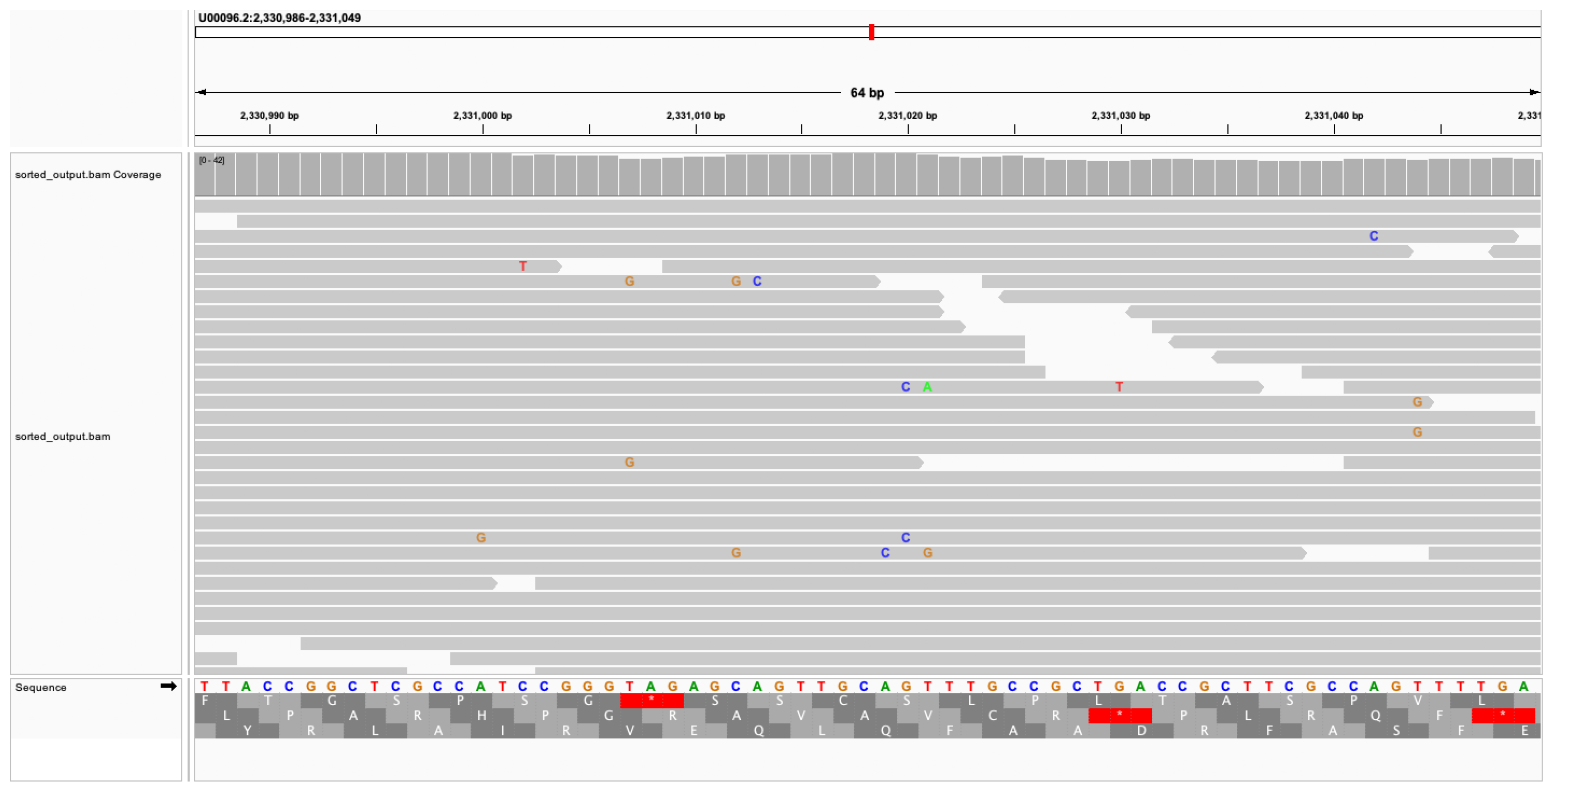

In [50]:
plt.figure(figsize=(20, 15)) 
img = mpimg.imread('./IGV_snapshots/translation.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Amino acids are displayed as blocks colored in alternating shades of gray. Methionines are colored green, and all stop codons are colored red. When you zoom all the way in, the amino acid symbols will appear.

### C(Q5)

- The number of mapped reads: 2294728
- The total number of reads: 2297765
- The percentage of all reads that are mapped to the refrence genome (including QC-failed reads): 99.87%
- The percentage of all reads that are mapped to the refrence genome (QC-passed reads only): 0%

In [27]:
# Determineing the percentage of short reads that are mapped to the reference genome
subprocess.run(f"samtools flagstat output.sam", shell=True)

2297765 + 0 in total (QC-passed reads + QC-failed reads)
2297280 + 0 primary
0 + 0 secondary
485 + 0 supplementary
0 + 0 duplicates
0 + 0 primary duplicates
2294728 + 0 mapped (99.87% : N/A)
2294243 + 0 primary mapped (99.87% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


CompletedProcess(args='samtools flagstat output.sam', returncode=0)

### C(Q6)

In [31]:
# Getting the read depth for the sorted BAM file at all positions of the reference genome
subprocess.run(f"samtools depth sorted_output.bam > depth.txt", shell=True)

# depth.txt consists of 3 columns each representing 1- Chromosome 2- Position 3- Depth of Coverage
# Calculating the mean of all reads
sm = 0
ln = 0
with open('depth.txt', 'r') as file:
    for line in file:
        sm += int(line.split()[2])
        ln += 1
print('Mean of all reads:' , sm/ln)

Mean of all reads: 49.22450116209468


### C(Q7)
29S21=1X25=

- 29S ➝ 29 soft-clipped bases. Soft clipping means these bases are present in the read but are not aligned to the reference sequence (possibly due to them only matching partially or not at all)
- 21= ➝ 21 bases that match the reference sequence exactly.
- 1X ➝ 1 base that does not match the reference sequence (mismatch).
- 25= ➝ 25 additional bases that match the reference sequence exactly.


20M2I1M1D10M

- 20M ➝ 20 bases are matched (can be either identical match = or mismatch X, we don't know).
- 2I ➝ Insertion of 2 bases into the read relative to the reference.
- 1M ➝ 1 base that is matched.
- 1D ➝ 1 base deleted from the read relative to the reference.
- 10M ➝ 10 bases matched following the deletion.

5M10N25M

- 5M ➝ 5 bases are matched.
- 10N ➝ A gap of 10 bases that represents an intron or skipped region in the reference.
- 25M ➝ 25 bases matched.